In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
l1 = torch.nn.Linear(784, 128)
l2 = torch.nn.Linear(128,10)
relu = torch.nn.ReLU(inplace = True)

In [ ]:
inputs = torch.randn(100, 784)
m1 = l1(inputs)
m2 = relu(m1)
outputs = l2(m2)

print("Input Tensor:", inputs.shape)
print("Output Tensor:", outputs.shape)

Input Tensor: torch.Size([100, 784])
Output Tensor: torch.Size([100, 10])


In [ ]:
inputs, outputs

In [ ]:
net2 = torch.nn.Sequential(l1, relu, l2)
outputs2 = net2(inputs)

print("Input Tensor:", inputs.shape)
print("Output Tensor:", outputs.shape)

Input Tensor: torch.Size([100, 784])
Output Tensor: torch.Size([100, 10])


#### 4.7

In [ ]:
np.random.seed(123)
x = np.random.randn(100,1)
#y는 x제곱에 난수의 10분의 1을 더한 값
y = x**2 + np.random.randn(100,1) * 0.1

x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

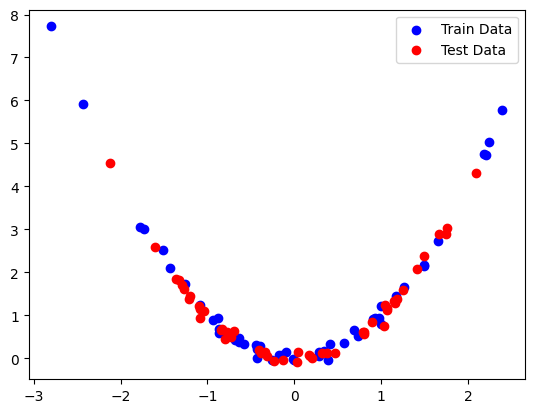

In [ ]:
plt.scatter(x_train,y_train, c='b', label = 'Train Data')
plt.scatter(x_test, y_test, c='r',label='Test Data')
plt.legend()
plt.show()

In [ ]:
import torch.optim as optim

W = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

def mse(y,y_hat):
  return torch.mean((y-y_hat)**2)

def hypothesis(x):
    return W*x +B

x_train = torch.tensor(x_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [ ]:
#1. 선형함수 1개
#train
epochs = 1000
lr = 1e-6

for epoch in range(epochs):
    Yp = hypothesis(x_train)
    loss = mse(y_train, Yp)
    loss.backward()

    with torch.no_grad():
        W -= lr*W.grad
        B -= lr*B.grad

        W.grad.zero_()
        B.grad.zero_()
    if (epoch%100 == 0):
        print(f"epochs:{epoch:>.4f}, loss = {loss:>.4f}")


epochs:0.0000, loss = 4.6571
epochs:100.0000, loss = 4.6563
epochs:200.0000, loss = 4.6555
epochs:300.0000, loss = 4.6547
epochs:400.0000, loss = 4.6539
epochs:500.0000, loss = 4.6532
epochs:600.0000, loss = 4.6524
epochs:700.0000, loss = 4.6516
epochs:800.0000, loss = 4.6508
epochs:900.0000, loss = 4.6500


In [ ]:
#test
Yp_test = W*x_test+B
Yp_test = Yp_test.data.numpy()

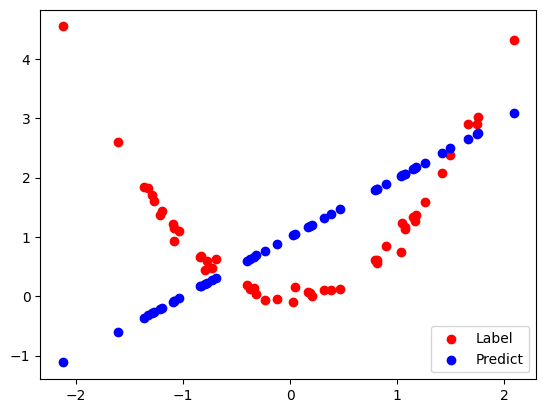

In [ ]:
plt.scatter(x_test, y_test,c='r',label='Label')
plt.scatter(x_test, Yp_test, c='b',label='Predict')
plt.legend()
plt.show()

In [ ]:
W1 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
W2 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

def mse(y,y_hat):
  return torch.mean((y-y_hat)**2)

def hypothesis(x):
    return W1*(x**2)+ W2*x +B

x_train = torch.tensor(x_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)


epochs = 1000
lr = 1e-6

for epoch in range(epochs):
    Yp = hypothesis(x_train)
    loss = mse(y_train, Yp)
    loss.backward()

    with torch.no_grad():
        W1 -= lr*W1.grad
        W2 -= lr*W2.grad
        B -= lr*B.grad

        W1.grad.zero_()
        W2.grad.zero_()
        B.grad.zero_()
    if (epoch%100 == 0):
        print(f"epochs:{epoch:>.4f}, loss = {loss:>.4f}")

<ipython-input-34-438d3356f382>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float32)
<ipython-input-34-438d3356f382>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.float32)
<ipython-input-34-438d3356f382>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype = torch.float32)
<ipython-input-34-438d3356f382>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach(

epochs:0.0000, loss = 2.4404
epochs:100.0000, loss = 2.4383
epochs:200.0000, loss = 2.4361
epochs:300.0000, loss = 2.4340
epochs:400.0000, loss = 2.4319
epochs:500.0000, loss = 2.4297
epochs:600.0000, loss = 2.4276
epochs:700.0000, loss = 2.4254
epochs:800.0000, loss = 2.4233
epochs:900.0000, loss = 2.4212


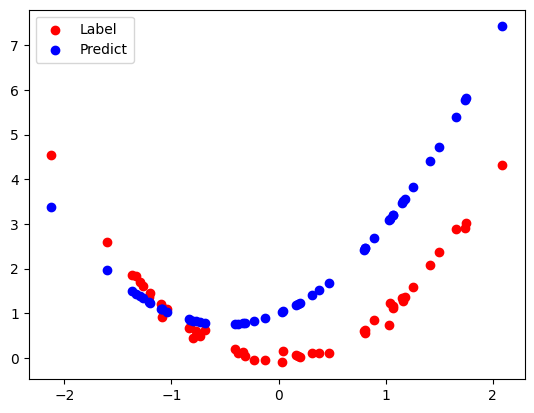

In [ ]:
Yp_test = W1*(x_test**2) + W2*x_test +B
Yp_test = Yp_test.data.numpy()
plt.scatter(x_test, y_test,c='r',label='Label')
plt.scatter(x_test, Yp_test, c='b',label='Predict')
plt.legend()
plt.show()

iter:1, loss = 1.8438
iter:2, loss = 1.8102
iter:3, loss = 1.8634
iter:4, loss = 1.8822
iter:5, loss = 1.9034
iter:6, loss = 2.0661
iter:7, loss = 1.8722
iter:8, loss = 1.9135
iter:9, loss = 1.9240
iter:10, loss = 1.9581


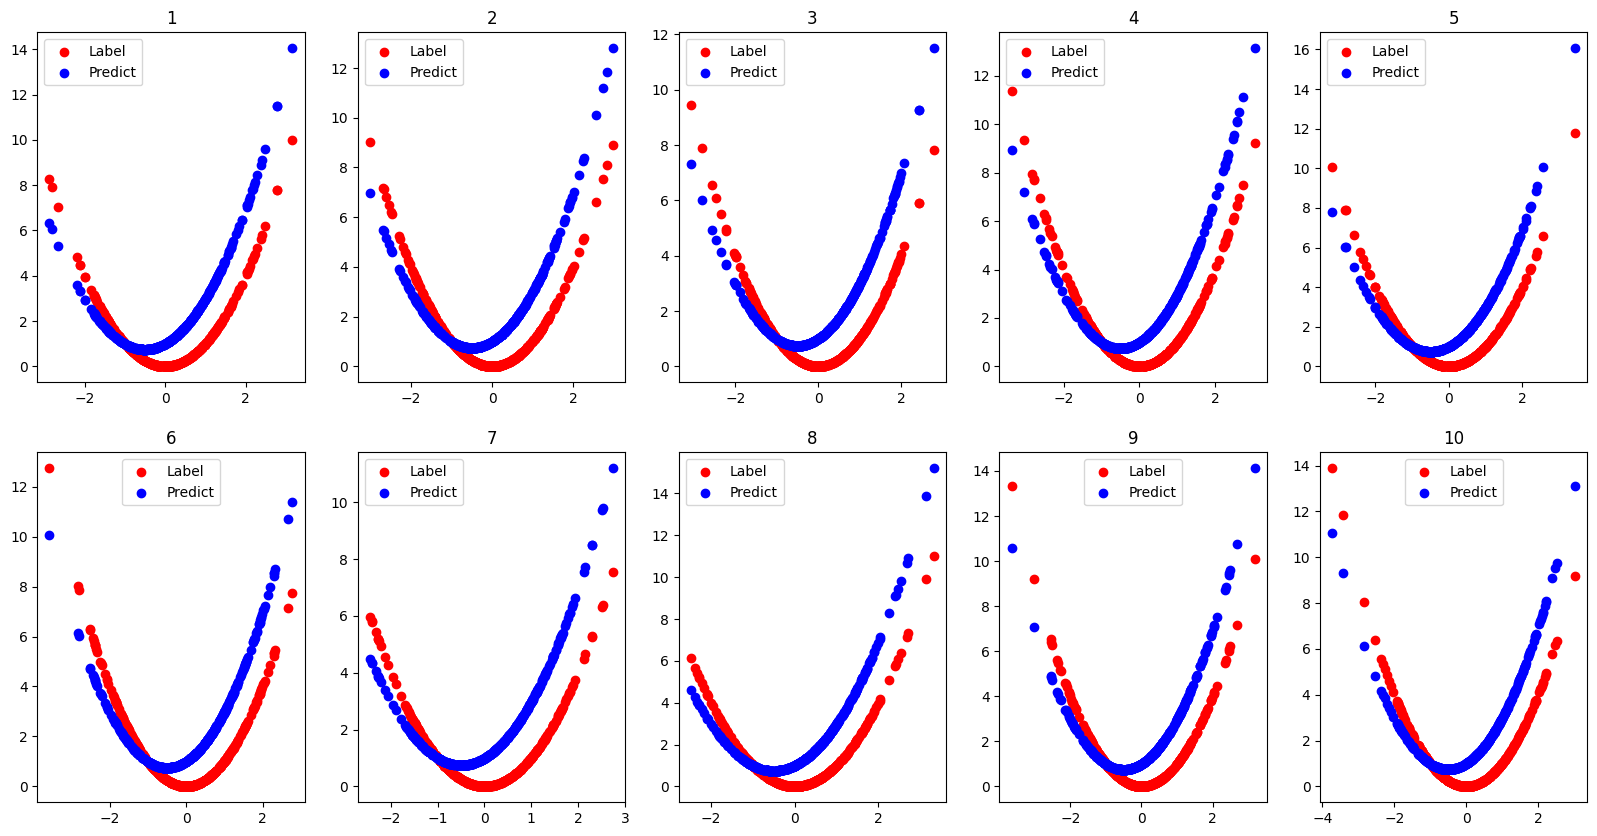

In [ ]:

plt.figure(figsize=(20,10))
for i in range(1,11):
    x = np.random.randn(1000,1)
    #y는 x제곱에 난수의 10분의 1을 더한 값
    y = x**2 + np.random.randn(1000,1) * 0.1

    x_train = x[:500,:]
    x_test = x[500:,:]
    y_train = y[:500,:]
    y_test = y[500:,:]

    x_train = torch.tensor(x_train, dtype = torch.float32)
    y_train = torch.tensor(y_train, dtype = torch.float32)
    x_test = torch.tensor(x_test, dtype = torch.float32)
    y_test = torch.tensor(y_test, dtype = torch.float32)

    W1 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
    W2 = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)
    B = torch.tensor(1.0, requires_grad = True, dtype = torch.float32)

    def mse(y,y_hat):
        return torch.mean((y-y_hat)**2)

    def hypothesis(x):
        return W1*(x**2)+ W2*x +B


    epochs = 5
    lr = 1e-6

    for epoch in range(epochs):
        Yp = hypothesis(x_train)
        loss = mse(y_train, Yp)
        loss.backward()

        with torch.no_grad():
            W1 -= lr*W1.grad
            W2 -= lr*W2.grad
            B -= lr*B.grad

            W1.grad.zero_()
            W2.grad.zero_()
            B.grad.zero_()
    else:
        print(f"iter:{i}, loss = {loss:>.4f}")

    Yp_test = W1*(x_test**2) + W2*x_test +B
    Yp_test = Yp_test.data.numpy()
    plt.subplot(2,5,i)
    plt.scatter(x_test, y_test,c='r',label='Label')
    plt.scatter(x_test, Yp_test, c='b',label='Predict')
    plt.legend()
    plt.title(i)






In [ ]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

<ipython-input-73-752f982fcb16>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(x_train).float()
<ipython-input-73-752f982fcb16>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train).float()
<ipython-input-73-752f982fcb16>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_test = torch.tensor(x_test).float()
<ipython-input-73-752f982fcb16>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_gr

In [ ]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 1)
    def forward(self, x):
        x1 = self.l1(x)
        return x1

lr = 1e-6
net = Net()
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()
num_epochs = 10000
history = np.zeros((0,2))

In [ ]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 2.28275
Epoch 100 loss: 2.28259
Epoch 200 loss: 2.28243
Epoch 300 loss: 2.28227
Epoch 400 loss: 2.28212
Epoch 500 loss: 2.28196
Epoch 600 loss: 2.28180
Epoch 700 loss: 2.28164
Epoch 800 loss: 2.28149
Epoch 900 loss: 2.28133
Epoch 1000 loss: 2.28117
Epoch 1100 loss: 2.28101
Epoch 1200 loss: 2.28085
Epoch 1300 loss: 2.28070
Epoch 1400 loss: 2.28054
Epoch 1500 loss: 2.28038
Epoch 1600 loss: 2.28022
Epoch 1700 loss: 2.28007
Epoch 1800 loss: 2.27991
Epoch 1900 loss: 2.27975
Epoch 2000 loss: 2.27960
Epoch 2100 loss: 2.27944
Epoch 2200 loss: 2.27928
Epoch 2300 loss: 2.27912
Epoch 2400 loss: 2.27897
Epoch 2500 loss: 2.27881
Epoch 2600 loss: 2.27865
Epoch 2700 loss: 2.27850
Epoch 2800 loss: 2.27834
Epoch 2900 loss: 2.27818
Epoch 3000 loss: 2.27802
Epoch 3100 loss: 2.27787
Epoch 3200 loss: 2.27771
Epoch 3300 loss: 2.27755
Epoch 3400 loss: 2.27740
Epoch 3500 loss: 2.27724
Epoch 3600 loss: 2.27708
Epoch 3700 loss: 2.27693
Epoch 3800 loss: 2.27677
Epoch 3900 loss: 2.27661
Epoch 4000 l

In [ ]:
# https://github.com/wikibook/pytorchdl2/blob/main/notebooks/ch04_model_dev.ipynb